# Network models

In this notebook we compare different network models to deterine the existence of the small-world effect. We say that a network is a small world if it has short paths and a high clustering coefficient.

For lower clustering values, it's not clear to determine when the coefficiente is high, enough. Therefore, usually we compare it with a random network with an equivalent size and connectivity degree.

## 1 Random network (ER)

1. generate a random network with and appropriate p value
2. extract the giant component (see [Networkx documentation](https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_giant_component.html))
3. plot it
4. analize the small-world effect (path length and clustering)
5. plot the degree distribution

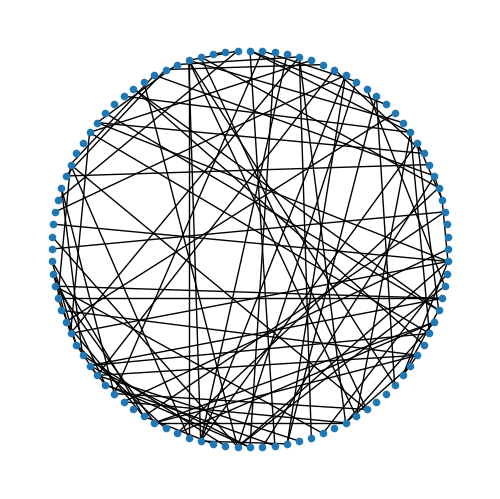

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


n = 100  # number of nodes
p = np.log(n) / n  # probability (ensure giant component)
m = np.round(n * (1 + p))  # number of links

# generation of a random network
G = nx.generators.gnm_random_graph(n, m)

# plot the network using a circular layout
nx.draw(G, pos=nx.circular_layout(G), node_size=20)
plt.axis('square')
plt.show()

## 2 Watts-Strogatz network

### 2.1 General model

1. generate a Watts-Strogatz network with $p=0.3$
3. plot it (circular layout, see [Networkx documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html))
4. analize the small-world effect (path length and clustering)
5. plot the  degree distribution

average shortest path length: 3.9575757575757575
clusteriung coefficient: 0.1994285714285714


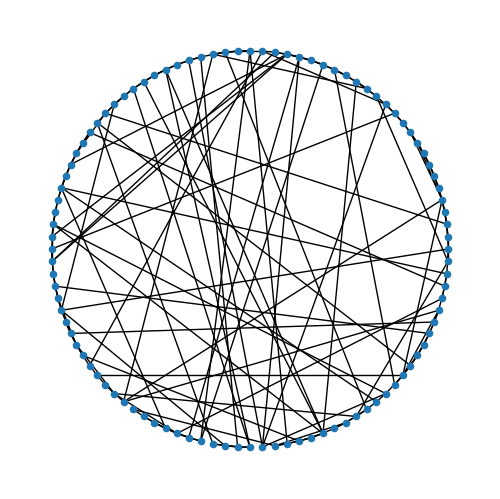

In [ ]:
# network parameters
n = 100
num_neigbors = 4

# generation of a watts-strogatz network
G = nx.watts_strogatz_graph(n, num_neigbors, 0.3)

# plot the network using a circular layout
nx.draw(G,
        pos = nx.circular_layout(G), node_size=20)
plt.axis('square')

# calculate small-world properties
print(f"average shortest path length: {nx.average_shortest_path_length(G)}")
print(f"clusteriung coefficient: {nx.average_clustering(G)}")

Text(0, 0.5, 'Frequency')

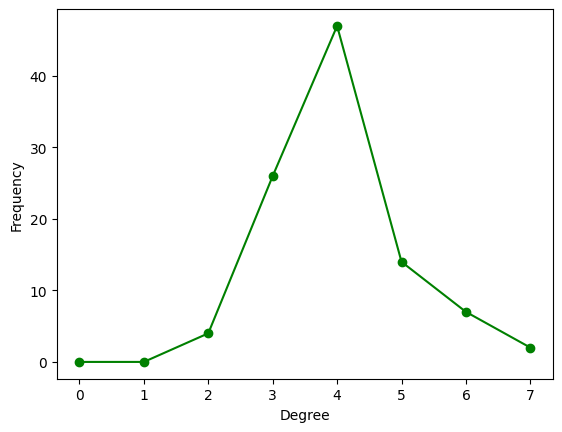

In [ ]:
# shows the degree distribution of the network (poisson)
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.plot(degrees, degree_freq,'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

### 2.2 Small-world parameters

Generate different network varying the redirection propability $p=0, p=0.3$ and $p=1$, as in the following figure
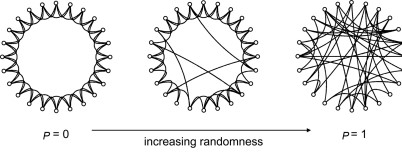

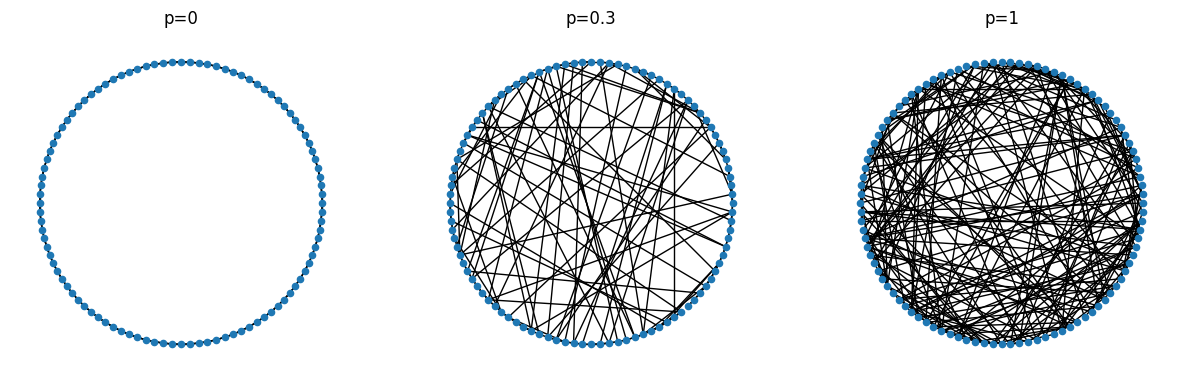

In [ ]:
n = 100
num_neigbors = 4

# network with p = 0
G0 = nx.watts_strogatz_graph(n, num_neigbors, 0)
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
nx.draw(G0,
        pos = nx.circular_layout(G0), node_size=20)
plt.title('p=0')
plt.axis('square')

# network with p = 0.3
G03 = nx.watts_strogatz_graph(n, num_neigbors, 0.3)
plt.subplot(1, 3, 2)
nx.draw(G03,
        pos = nx.circular_layout(G03), node_size=20)
plt.title('p=0.3')
plt.axis('square')

# network with p = 1
G1 = nx.watts_strogatz_graph(n, num_neigbors, 1)
plt.subplot(1, 3, 3)
nx.draw(G1,
        pos = nx.circular_layout(G1), node_size=20)
plt.title('p=1')
plt.axis('square')
plt.show()

### 2.3 Significance

Modify the code in point 1 to generate a random network equivalent to the Watts-Strogatz and compare them (average degree, network diameter, clustering, degree distribution)


L: 3.4007994950557543
C: 0.041812439261418866


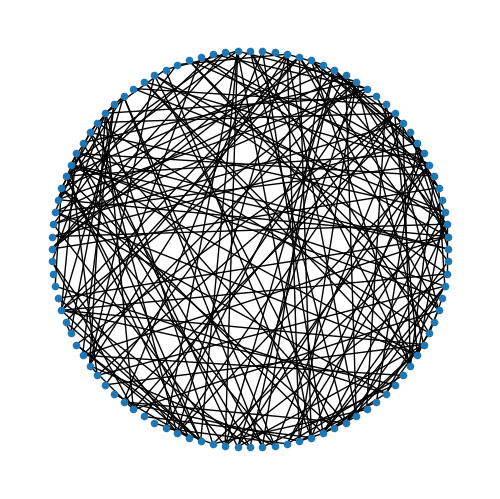

In [ ]:
num_edges = G.number_of_edges()

# random network
G = nx.generators.gnm_random_graph(n=n, m=num_edges)
nx.draw(G, pos=nx.circular_layout(G), node_size=20)
plt.axis('square')

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# calculate path length and clustering
print(f"L: {nx.average_shortest_path_length(G0)}")
print(f"C: {nx.average_clustering(G0)}")


### 2.4 Small world

Generate networks with different redirection probabilities to check the variation of the clustering and path length (chek the slides). Generate several networks for the same $p$ and average the results. Plot them in the same graphics (x axis y log scale, left and right vertical axis for clustering and length)

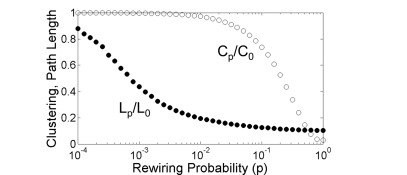

The results in this plot obt ained with n = 1000 and k = 10


In [ ]:
n = 1000
k = 10
rep = 10
L = []
C = []

# generate logspaced values from 10^-4 to 10^0
redir_prob = np.power(10,np.linspace(-4, 0, num=19, endpoint=True))

# varying redirection probability
for p in redir_prob:
    Li = []
    Ci = []
    # repeat rep times for each configuration
    for i in range(rep):
        # generate watts-strogatz network
        G = nx.watts_strogatz_graph(n, k, p)
        # measure path length and clustering
        Li.append(nx.average_shortest_path_length(G))
        Ci.append(nx.average_clustering(G))
    L.append(np.mean(Li))
    C.append(np.mean(Ci))

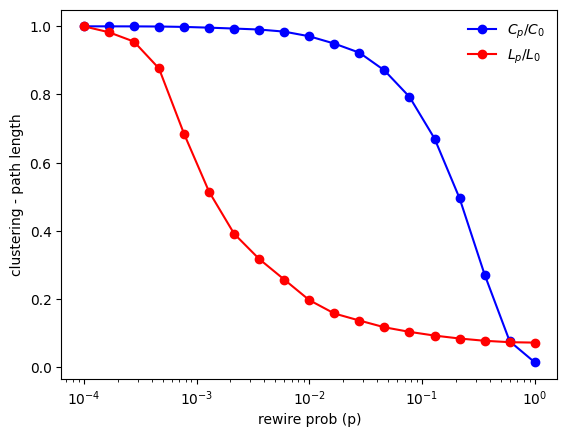

In [ ]:
# normalize values
clustering = np.array(C)/C[0]
path_length = np.array(L)/L[0]

# plot the result
plt.figure()
plt.semilogx(redir_prob, clustering, '-bo')
plt.semilogx(redir_prob, path_length, '-ro')
plt.legend(('$C_p/C_0$','$L_p/L_0$'),frameon=False)
plt.xlabel('rewire prob (p)')
plt.ylabel('clustering - path length')
# Show plot
plt.show()

## 3 Preferential attachment network

Study the preferential attachment effect in an actual network. The dataset belong to the George R. Martin's book 'Storm of Swords'. Nodes are the characters and they are connected by a llink if they interact in one scene.

1. load the data available in `stormofwords.csv` file **(upload it first to the session storage)**
2. generate the network
3. plot it
4. analize the small-world effect (path length and clustering)
5. plot the degree distribution (linear and loglog)
6. estimate the parameter of the power-law (linear regression over log data)

In [ ]:
import pandas as pd

df = pd.read_csv('stormofswords.csv',names=["source", "target", "weights"])

In [ ]:
G = nx.from_pandas_edgelist(df, edge_attr="weights", create_using=nx.Graph())

# get giant component
Gcc = max(nx.connected_components(G), key=len)
G0 = G.subgraph(Gcc)
print(f"nodes: {G0.number_of_nodes()}")
print(f"edges: {G0.number_of_edges()}")


nodes: 107
edges: 352


In [ ]:
print(f"L: {nx.average_shortest_path_length(G0)}")
print(f"C: {nx.average_clustering(G0)}")

L: 2.903897019925939
C: 0.551443151559996


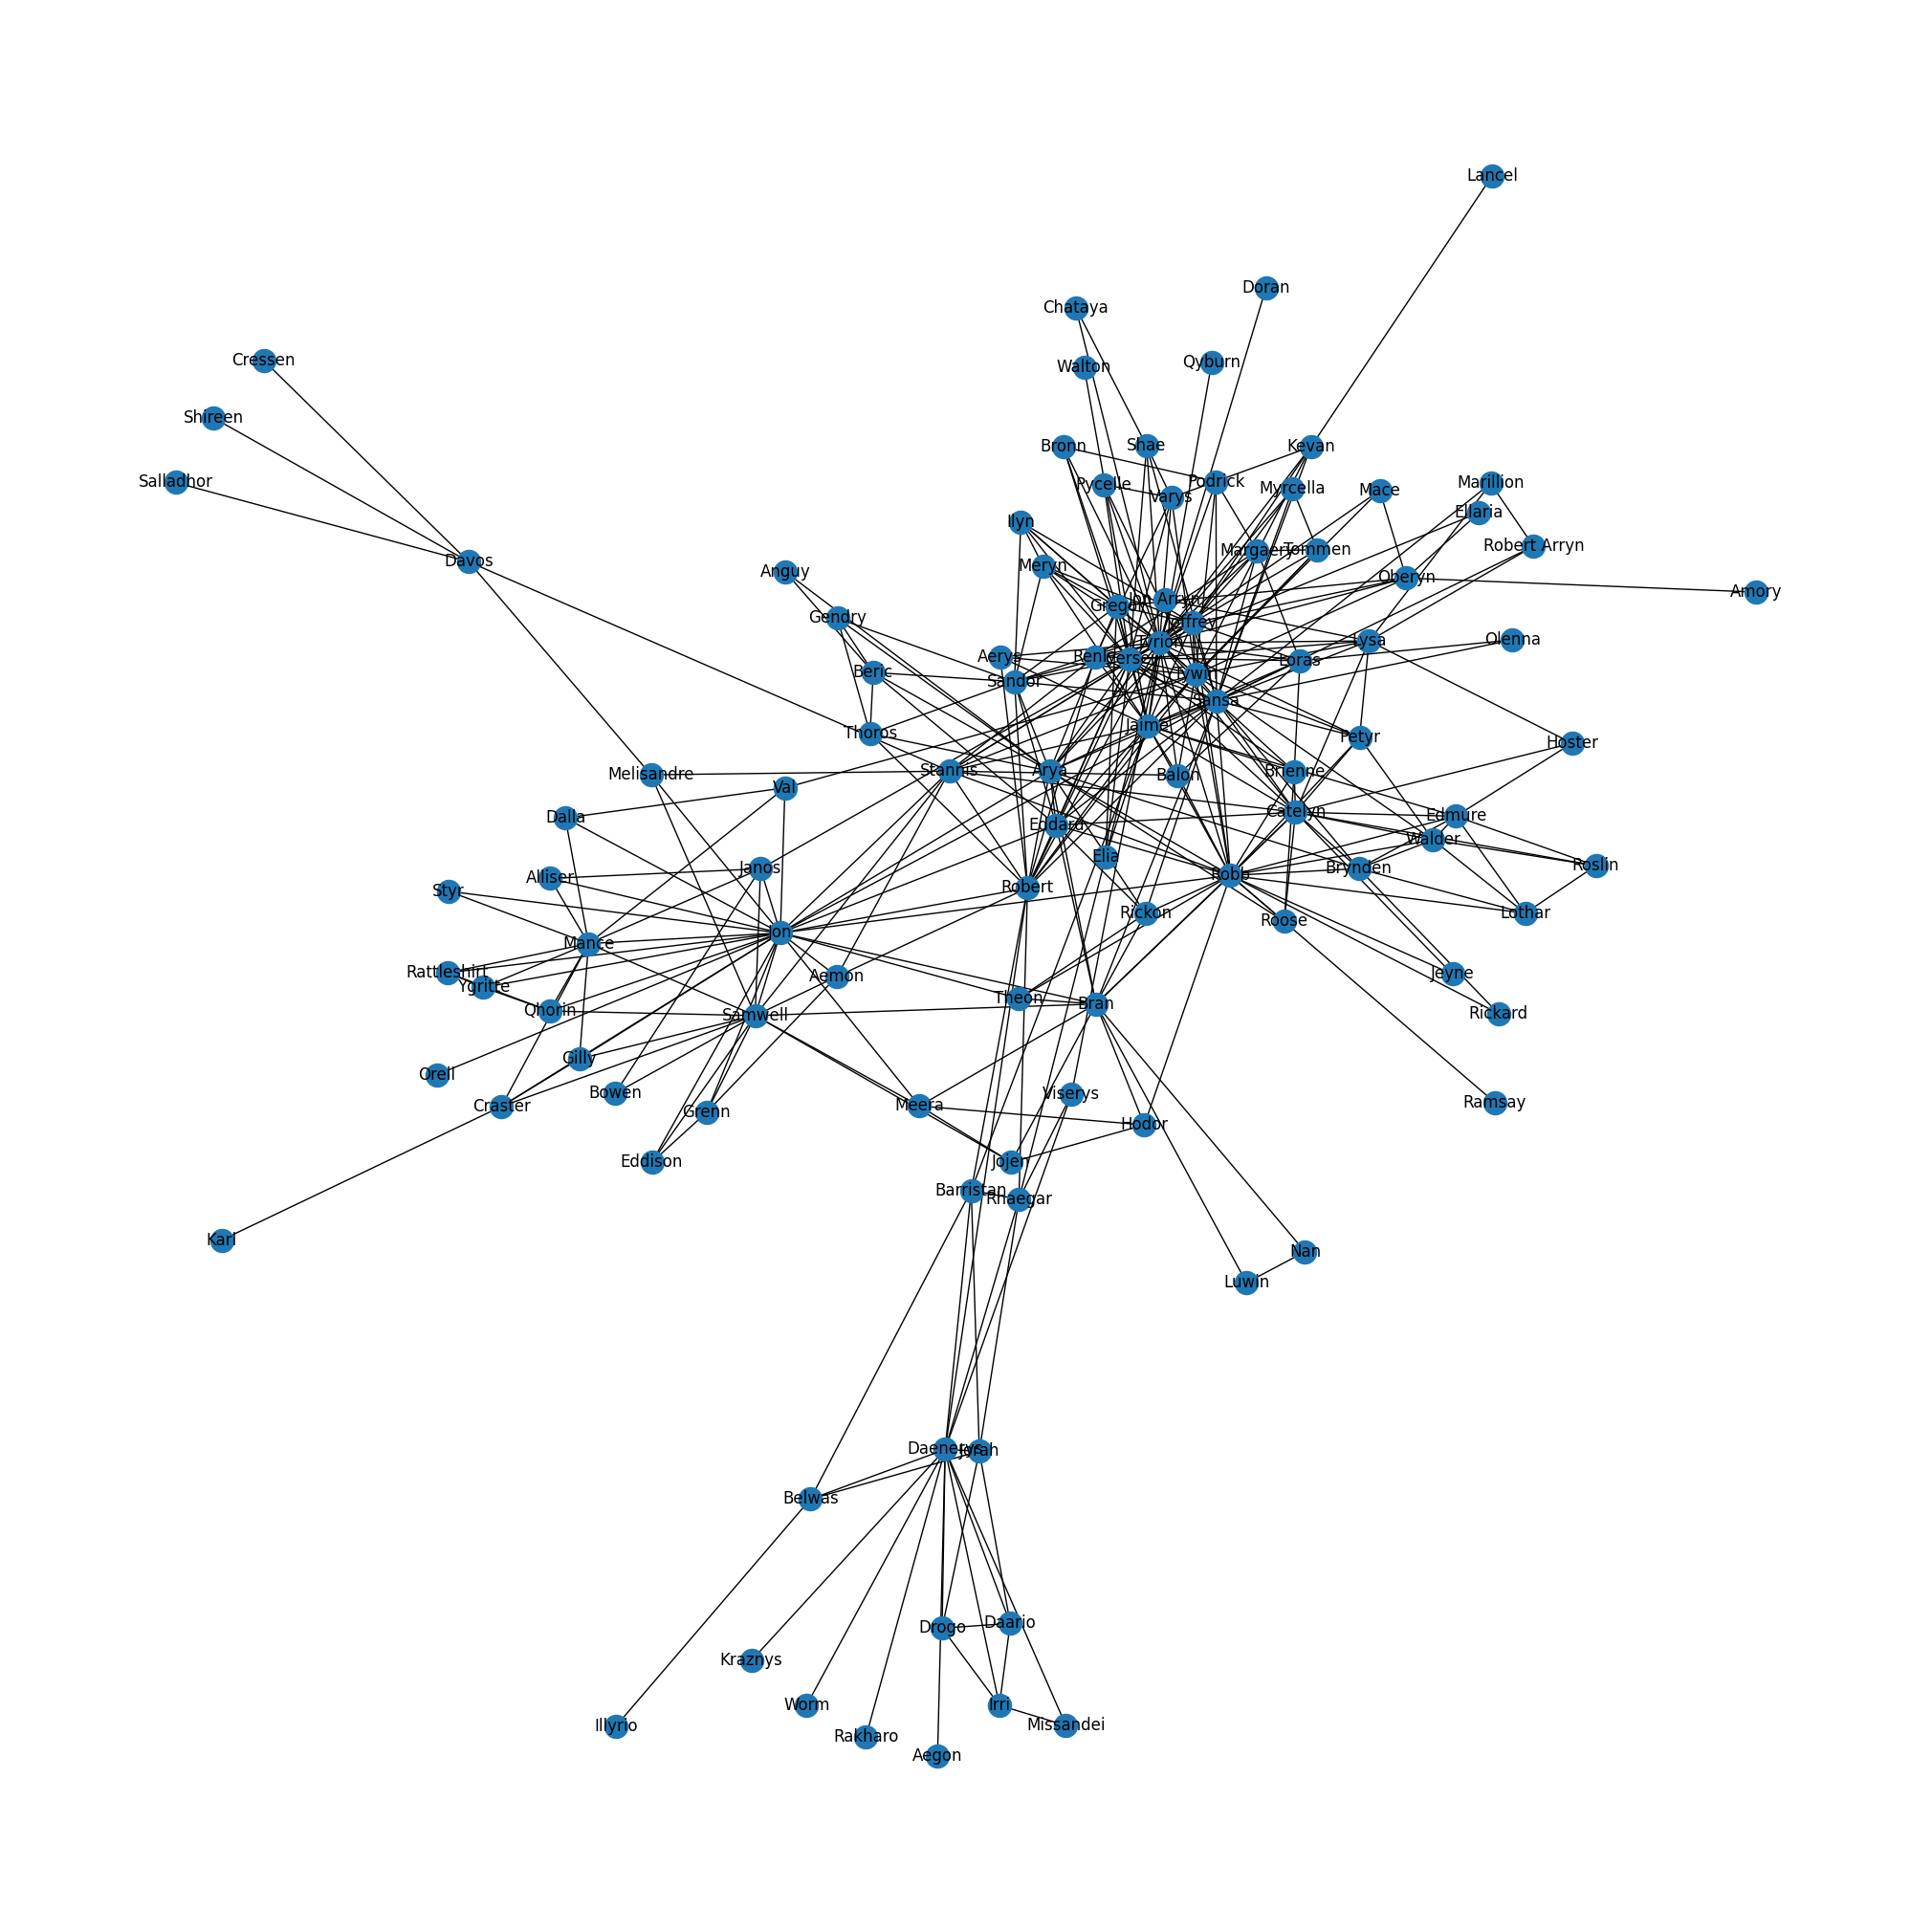

In [ ]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G0)
nx.draw(G0,pos=pos)
nx.draw_networkx_labels(G0, pos=pos)
plt.show()

Text(0, 0.5, 'Frequency')

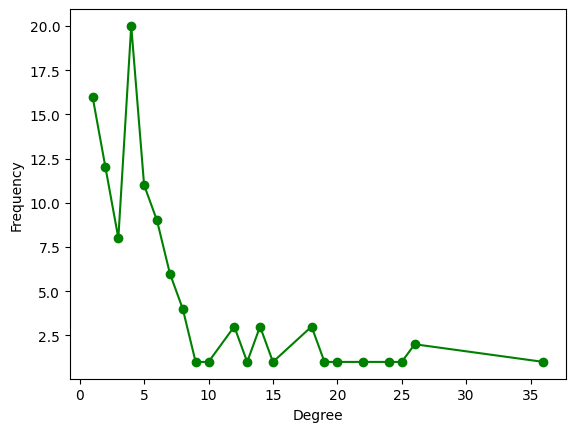

In [ ]:
degree_freq = np.array(nx.degree_histogram(G0))
degrees = np.nonzero(degree_freq)[0]
degree_freq = degree_freq[degrees]
plt.plot(degrees, degree_freq,'og-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

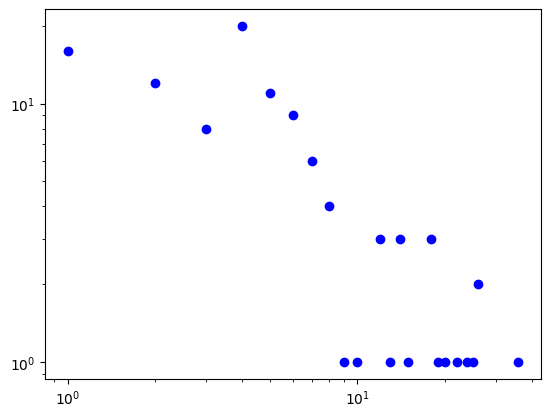

In [ ]:
plt.loglog(degrees, degree_freq,'ob')
plt.show()

### 3.2 Identify the most relevant nodes

Calculate the main centrality measures (in and out degree, closeness, betweenness and pagerank) and create a table with the 10 nodes with highest values

In [ ]:
from heapq import nlargest
import pandas as pd

deg = nx.degree_centrality(G)
close = nx.closeness_centrality(G03)
betw = nx.betweenness_centrality(G03)
pagerank = nx.pagerank(G03)

res = {
      'degree':nlargest(10,deg,key=deg.get),
      'closeness':nlargest(10,close,key=close.get),
      'betweenness':nlargest(10,betw,key=betw.get),
      'pagerank':nlargest(10,pagerank,key=pagerank.get)}

df = pd.DataFrame(res)
print(df)

    degree  closeness  betweenness  pagerank
0   Tyrion         56           81        56
1      Jon         31           56        72
2    Sansa         81           90        42
3     Robb         28           99        90
4    Jaime         62           31        62
5    Tywin         99           38        81
6   Cersei         38           62        31
7     Arya         37            9        99
8   Robert         80           72        89
9  Joffrey         23           42        23
